<a href="https://colab.research.google.com/github/mohitrajparit/dsML/blob/main/LinearRegressionyt01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("area.csv")
print(df)

   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


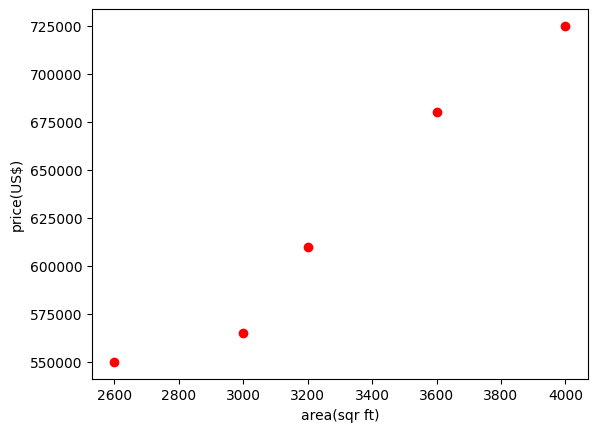

In [45]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='o')

In [12]:
new_df=df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [13]:
price=df['price']
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [56]:
reg=linear_model.LinearRegression()
reg.fit(new_df,price)
print(price)
reg.predict(new_df)

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64


array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

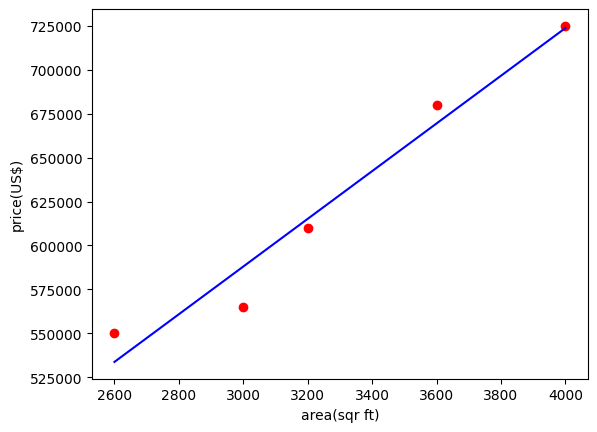

In [58]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='o')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [17]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [21]:
print(reg.coef_,reg.intercept_)

[135.78767123] 180616.43835616432


In [25]:
new_areas=pd.read_csv("new_area.csv")
new_areas

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [26]:
pred=reg.predict(new_areas)
pred

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [27]:
new_areas['price']=pred
new_areas

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [28]:
new_areas.to_csv("predictions.csv")

In [31]:
#predicting cananda per capita income data
inc=pd.read_csv("canada_income.csv")
inc.head(4)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248


Text(0, 0.5, 'per capita income (US$)')

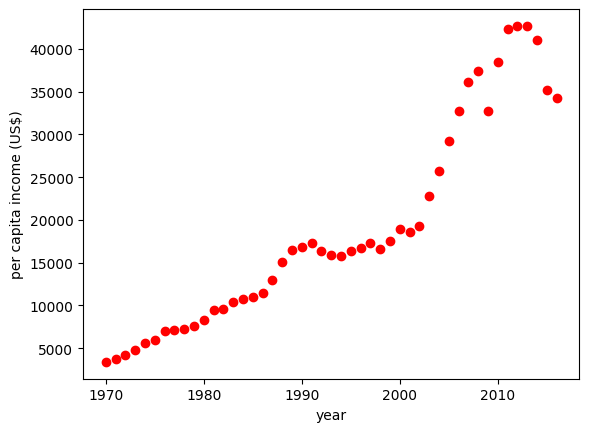

In [40]:
plt.scatter(inc['year'],inc['per capita income (US$)'],color='red',marker='o')
plt.xlabel('year')
plt.ylabel('per capita income (US$)')

In [33]:
year=inc.drop('per capita income (US$)',axis='columns')
print(year.head(3))
income=inc['per capita income (US$)']
print(income.head(3))

   year
0  1970
1  1971
2  1972
0    3399.299037
1    3768.297935
2    4251.175484
Name: per capita income (US$), dtype: float64


In [34]:
reg.fit(year,income)


LinearRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


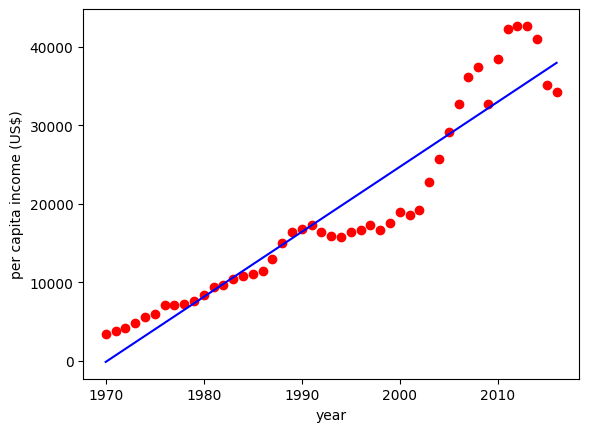

In [41]:
plt.scatter(inc['year'],inc['per capita income (US$)'],color='red',marker='o')
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.plot(year,reg.predict(year),color='blue')
plt.show()

In [36]:
reg.predict([[2020]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

#Linear regression with multiple variables

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
df=pd.read_csv("homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [5]:
df.bedrooms.median()

4.0

In [6]:
df.bedrooms=df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [8]:
reg=linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)


LinearRegression()

In [9]:
reg.predict([[3000,4,24]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([573504.61819637])

In [10]:
reg.predict([[300,4,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([338802.1010339])

In [14]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [13]:
reg.intercept_

221323.00186540396

#Exercise


In [38]:
hr=pd.read_csv("hiring.csv")
hr

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [39]:
# !pip install word2number
from word2number import w2n
hr.experience=hr.experience.fillna('zero')
hr.experience=hr.experience.apply(w2n.word_to_num)
hr

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [40]:
import math
hr['test_score(out of 10)']=hr['test_score(out of 10)'].fillna(math.floor((hr['test_score(out of 10)'].mean())))
hr

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [41]:
reg=linear_model.LinearRegression()
reg.fit(hr[['experience','test_score(out of 10)','interview_score(out of 10)']],hr["salary($)"])

LinearRegression()

In [42]:
reg.predict([[2,9,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [44]:
reg.predict([[12,10,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

In [45]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [46]:
reg.intercept_

14992.65144669314